# Machine Learning


# Table of Contents


### 1. Import data and libraries

### 2. Data Cleaning

### 3. Data prep for regression

### 4. Regression analysis

# 1 import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Javier\Documents\CF Gun Violence\02 Data\Original Data'

In [4]:
# load data
df = pd.read_csv(os.path.join(path,'gun_violence_clean.csv'), index_col = False)

In [6]:
df

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,36,482856,2013-03-13,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,...,0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0
1,83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,2,2,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,...,1::72||2::45||4::37,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35.0,8.0
2,101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0,4,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,...,0::34||1::14||2::14||3::15||4::39,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51.0,19.0
3,181,492276,2013-08-25,Florida,Lake Butler,1050 Southeast 6th Street,4,1,http://www.gunviolencearchive.org/incident/492276,http://www.usatoday.com/story/news/nation/2013...,...,0::28||1::80||2::66||3::44||4::72,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Rolando Gonzalez-Delgado||1::Marvin Pritche...,4::Co-worker,0::Killed||1::Killed||2::Injured||3::Killed||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/motive-a-mystery-i...,19.0,5.0
4,200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,...,0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,239279,1080309,2018-03-28,Illinois,Chicago,4400 W Maypole Ave,0,2,http://www.gunviolencearchive.org/incident/108...,https://chicago.suntimes.com/news/man-charged-...,...,0::57||1::25,0::Adult 18+||1::Adult 18+,0::Male||1::Male,1::Kenneth Baines,1::Armed Robbery,0::Injured||1::Injured,0::Victim||1::Subject-Suspect,https://chicago.suntimes.com/news/man-exchange...,10.0,5.0
1055,239297,1079712,2018-03-28,Tennessee,Knoxville,9729 Middlebrook Pike,0,1,http://www.gunviolencearchive.org/incident/107...,https://www.wbir.com/article/news/crime/man-ar...,...,1::30,0::Adult 18+||1::Adult 18+,0::Female||1::Male,1::Antonio Cortez Williams,1::Significant others - current or former,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,https://www.knoxnews.com/story/news/crime/2018...,89.0,7.0
1056,239335,1080691,2018-03-29,Utah,Salt Lake City (Murray),4263 Jummer Way,2,0,http://www.gunviolencearch

# Data Cleaning

In [7]:
df.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [8]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [9]:
df.shape

(1059, 29)

In [10]:
# check for missing values
df.isnull().sum()

incident_id                    0
date                           0
state                          0
city_or_county                 0
address                        0
n_killed                       0
n_injured                      0
incident_url                   0
source_url                     0
incident_url_fields_missing    0
congressional_district         0
gun_stolen                     0
gun_type                       0
incident_characteristics       0
latitude                       0
location_description           0
longitude                      0
n_guns_involved                0
notes                          0
participant_age                0
participant_age_group          0
participant_gender             0
participant_name               0
participant_relationship       0
participant_status             0
participant_type               0
sources                        0
state_house_district           0
state_senate_district          0
dtype: int64

In [11]:
# check for duplicates
dups = df.duplicated()

In [12]:
dups.shape

(1059,)

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_killed', ylabel='Density'>

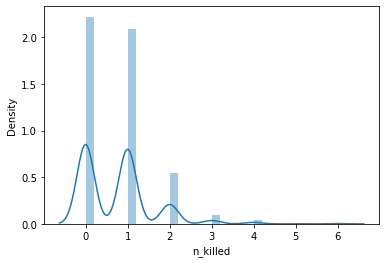

In [13]:
# extreme value check
sns.distplot(df['n_killed'], bins=30) # Shows extreme values

In [14]:
df['n_killed'].mean()#check for mean

0.7412653446647781

In [15]:
df['n_killed'].median()#check for median

1.0

In [16]:
df['n_killed'].max()#check for max

6

# 3 Data Prep for regression analysis

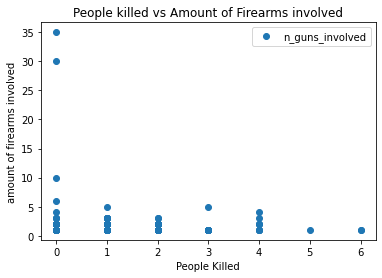

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'n_killed', y='n_guns_involved',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('People killed vs Amount of Firearms involved')  
plt.xlabel('People Killed')  
plt.ylabel('amount of firearms involved')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['n_killed'].values.reshape(-1,1)
y = df['n_guns_involved'].values.reshape(-1,1)

In [27]:
X

array([[6],
       [2],
       [0],
       ...,
       [2],
       [2],
       [1]], dtype=int64)

In [28]:
y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Hypothesis

The less guns involved the more people are killed when it comes to gun violence

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

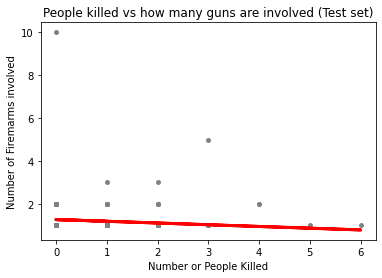

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('People killed vs how many guns are involved (Test set)')
plot_test.xlabel('Number or People Killed')
plot_test.ylabel('Number of Firemarms involved')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0804027]]
Mean squared error:  0.42272139650521995
R2 score:  -0.02755410928087887


Interpretation: The slope is slightly negative so the relationship is negative. This also correlates with my hypothesis becuase most murders done by firearms theres only one gun involved. The r2 score is .37 so its not a good fit. 

In [36]:
y_predicted

array([[1.19239228],
       [1.27279499],
       [1.19239228],
       [1.11198958],
       [1.27279499],
       [1.11198958],
       [1.19239228],
       [1.27279499],
       [1.27279499],
       [1.19239228],
       [1.11198958],
       [1.27279499],
       [1.19239228],
       [1.19239228],
       [1.27279499],
       [1.11198958],
       [1.27279499],
       [1.19239228],
       [1.19239228],
       [1.27279499],
       [1.27279499],
       [1.27279499],
       [1.19239228],
       [1.11198958],
       [1.27279499],
       [1.27279499],
       [1.27279499],
       [1.19239228],
       [1.27279499],
       [1.27279499],
       [1.19239228],
       [1.19239228],
       [1.27279499],
       [1.27279499],
       [1.19239228],
       [1.19239228],
       [1.19239228],
       [1.11198958],
       [1.27279499],
       [1.27279499],
       [1.27279499],
       [1.19239228],
       [1.27279499],
       [1.19239228],
       [0.95118417],
       [1.19239228],
       [1.19239228],
       [1.192

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.0,1.192392
1,2.0,1.272795
2,2.0,1.192392
3,2.0,1.111990
4,1.0,1.272795
5,1.0,1.111990
6,1.0,1.192392
7,2.0,1.272795
8,1.0,1.272795
9,1.0,1.192392


# Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0804027]]
Mean squared error:  2.8597697711739065
R2 score:  0.0015176813609670825


REFLECTIONS OU HAVE ON IMPACT OF POSSIBLE DATA

The values are identical to the original model except our Mean squared error is a bit higher and the R2 score is barely positive instead of negative now. This could be true because there could be more guns involved with a murder instead of just one but highly unlikley

In [ ]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of people killed vs How many guns involved(Train set)')
plot_test.xlabel('number of poeple killed')
plot_test.ylabel('Amount of Guns involved')
plot_test.show()